# Aylein News API

In [ ]:
pip install -U aylien-news-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['summary']
        article_dict['content'] = file[i]['body']
        article_dict['time'] = file[i]['published_at']
        article_dict['url'] = file[i]["permalink"]
        article_results.append(article_dict)
    return article_results



In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-01-01T00:00:00Z',
    'published_at_end': '2022-02-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)



In [ ]:
# Load the JSON file
with open('stories.json', 'r') as f:
    data = json.load(f)

# Get the keys of the dictionary
keys = data[0].keys()

# Print the keys
print(keys)

dict_keys(['title', 'author', 'body', 'language', 'published_at', 'source', 'summary'])


In [ ]:

# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s1.xlsx', index=False)


February to March

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-02-02T00:00:00Z',
    'published_at_end': '2022-03-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                 'score': 1.0,
                 'taxonomy': 'aylien'}],
 'characters_count': 2673,
 'clusters': [306997601],
 'entities': [{'body': {'sentiment': {'confidence': 0.75,
                                      'polarity': 'neutral'},
                        'surface_forms': [{'frequency': 2,
                                           'mentions': [{'index': {'end': 90,
                                                                   'start': 43},
                                                         'sentiment': {'confidence': 0.53,
                                                                       'polarity': 'positive'}},
                                                        {'index': {'end': 2523,
                                                                   'start': 2476},
                                                         'sentiment': {'confidence': 0.75,
                                            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:

# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s2.xlsx', index=False)


March to april

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-03-02T00:00:00Z',
    'published_at_end': '2022-04-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                 'score': 0.12,
                 'taxonomy': 'iptc-subjectcode'},
                {'confident': None,
                 'id': 'ay.fin',
                 'label': 'Finance',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin',
                           'parent': None,
                           'parents': []},
                 'score': 1.0,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.fin.btc',
                 'label': 'Bitcoin Crypto Trading',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.btc',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.digcurr']},
                 'score': 1.0,
                 'tax

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s3.xlsx', index=False)

April to may

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-04-02T00:00:00Z',
    'published_at_end': '2022-05-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                                                         'sentiment': {'confidence': 0.7,
                                                                       'polarity': 'neutral'}}],
                                           'text': 'Technical'}]},
               'external_ids': {'duns': None},
               'id': 'N230116229093322152403320805804879465414',
               'links': None,
               'overall_frequency': 1,
               'overall_prominence': 0.75,
               'overall_sentiment': {'confidence': 0.7, 'polarity': 'neutral'},
               'stock_tickers': [],
               'title': {'sentiment': None, 'surface_forms': []},
               'types': ['Organization']},
              {'body': {'sentiment': {'confidence': 0.68,
                                      'polarity': 'neutral'},
                        'surface_forms': [{'frequency': 6,
                                           'mentions': [{'index': {

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s4.xlsx', index=False)

May to June

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-05-02T00:00:00Z',
    'published_at_end': '2022-06-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
         '\n'
         '\n'
         'Hashprice is a Bitcoin mining metric that measures the revenue '
         'potential of a unit of Bitcoin mining compute power (what we call '
         'hashrate). Hashrate is measured in dollars per terahash (TH) per '
         'day. So if hashprice is $0.12/TH/day, then a 100 TH machine '
         '(“terahashes” refers to how fast a mining rig produces computations) '
         'can produce $12 per day. \n'
         '\n'
         '\n'
         'Two things affect Bitcoin’s hashprice: Bitcoin’s actual price and '
         'Bitcoin’s mining difficulty, which impacts the likelihood of solving '
         'a block and obtaining a reward of 6.25 BTC (approximately $187,500). '
         'For a bit of context, at bitcoin’s all time high in November 2021, a '
         'block reward would have yielded approximately $430,000. \n'
         '\n'
         '\n'
         'Bitcoin’s mining difficulty adjusts upward

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s5.xlsx', index=False)

March to April

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-06-02T00:00:00Z',
    'published_at_end': '2022-07-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
              'tweeted',
              'liquidation'],
 'language': 'en',
 'license_type': 0,
 'links': {'canonical': None,
           'clusters': '/stories?clusters[]=352784669',
           'permalink': 'https://www.msn.com/en-in/money/topstories/cryptocurrency-prices-today-june-17-bitcoin-down-8-as-major-cryptos-witness-bloodbath-after-us-fed-rate-hike/ar-AAYzpNA',
           'related_stories': '/related_stories?story_id=3736088248'},
 'media': [{'content_length': 64856,
            'format': 'JPEG',
            'height': 432,
            'type': 'image',
            'url': 'https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AAXV5F3.img?w=768&h=432&m=4&q=54',
            'width': 768}],
 'paragraphs_count': 2,
 'published_at': datetime.datetime(2022, 6, 17, 5, 51, 31, tzinfo=tzlocal()),
 'published_datetime': None,
 'sentences_count': 17,
 'sentiment': {'body': {'polarity': 'negative', 'score': 0.76},
               'title': {'p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s6.xlsx', index=False)

July to August 2022

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-07-02T00:00:00Z',
    'published_at_end': '2022-08-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin']},
                 'score': 1.0,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.econ.area',
                 'label': 'Area Economies',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.econ.area',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.econ']},
                 'score': 0.8,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.econ.recess',
                 'label': 'Economic Recession',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.econ.recess',
                           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s7.xlsx', index=False)

August to September 2022

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-08-02T00:00:00Z',
    'published_at_end': '2022-09-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.biz.manage',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.biz']},
                 'score': 0.7,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.biz.markets',
                 'label': 'Product and Service Markets',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.biz.markets',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.biz.salmark']},
                 'score': 0.7,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.biz.markfore',
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s8.xlsx', index=False)

September to October 2022

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-09-02T00:00:00Z',
    'published_at_end': '2022-10-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                                                                       'polarity': 'neutral'}},
                                                        {'index': {'end': 339,
                                                                   'start': 332},
                                                         'sentiment': {'confidence': 0.82,
                                                                       'polarity': 'neutral'}},
                                                        {'index': {'end': 361,
                                                                   'start': 354},
                                                         'sentiment': {'confidence': 0.83,
                                                                       'polarity': 'neutral'}}],
                                           'text': 'Bitcoin'}]},
               'external_ids': {'duns': None},
               'id': 'Q131723',
            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s9.xlsx', index=False)

October to November 2022

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-10-02T00:00:00Z',
    'published_at_end': '2022-11-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
               'links': None,
               'overall_frequency': 1,
               'overall_prominence': 0.02,
               'overall_sentiment': {'confidence': 0.65, 'polarity': 'neutral'},
               'stock_tickers': [],
               'title': {'sentiment': None, 'surface_forms': []},
               'types': ['Organization']},
              {'body': {'sentiment': {'confidence': 0.83,
                                      'polarity': 'neutral'},
                        'surface_forms': [{'frequency': 1,
                                           'mentions': [{'index': {'end': 1391,
                                                                   'start': 1385},
                                                         'sentiment': {'confidence': 0.83,
                                                                       'polarity': 'neutral'}}],
                                           'text': 'Tether'}]},
               'e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s10.xlsx', index=False)

November to December

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-11-02T00:00:00Z',
    'published_at_end': '2022-12-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
         'implosion.”\n'
         'Bitcoin is down more than 75 per cent since hitting an all-time high '
         'of close to $69,000 in November 2021.\n'
         'After several months of stability, bitcoin crashed below $16,000 for '
         'the first time since November 2020 following the downfall of FTX.\n'
         'The world’s third largest exchange by trading volume suspended '
         'withdrawals of more than a million customers last week, according to '
         'court filings, after a liquidity crisis forced the firm to file for '
         'bankruptcy.\n'
         'In a statement posted to Twitter, Genesis said it was working to '
         'avoid the same fate as FTX.\n'
         '“We have hired the best advisors in the industry to explore all '
         'possible options,” the company wrote.\n'
         '“Next week, we will deliver a plan for the lending business. We’re '
         'working tirelessly to identify the be

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s11.xlsx', index=False)

December to Jan 2023


In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2022-12-02T00:00:00Z',
    'published_at_end': '2023-01-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
              {'body': {'sentiment': {'confidence': 0.81,
                                      'polarity': 'neutral'},
                        'surface_forms': [{'frequency': 1,
                                           'mentions': [{'index': {'end': 1218,
                                                                   'start': 1208},
                                                         'sentiment': {'confidence': 0.81,
                                                                       'polarity': 'neutral'}}],
                                           'text': 'stablecoin'}]},
               'external_ids': {'duns': None},
               'id': 'Q55582088',
               'links': {'dbpedia': None,
                         'wikidata': 'https://www.wikidata.org/wiki/Q55582088',
                         'wikipedia': 'https://en.wikipedia.org/wiki/Stablecoin'},
               'overall_frequency': 1,
               'overall_pr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s12.xlsx', index=False)

Jan to Feb 23


In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2023-01-02T00:00:00Z',
    'published_at_end': '2023-02-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
               'id': 'N232390543596742420576799395024974904969',
               'links': None,
               'overall_frequency': 1,
               'overall_prominence': 0.35,
               'overall_sentiment': {'confidence': 0.73, 'polarity': 'neutral'},
               'stock_tickers': [],
               'title': {'sentiment': None, 'surface_forms': []},
               'types': ['Organization']},
              {'body': {'sentiment': {'confidence': 0.92,
                                      'polarity': 'positive'},
                        'surface_forms': [{'frequency': 3,
                                           'mentions': [{'index': {'end': 744,
                                                                   'start': 741},
                                                         'sentiment': {'confidence': 0.59,
                                                                       'polarity': 'neutral'}},
                  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
                {'confident': None,
                 'id': 'ay.fin.btc',
                 'label': 'Bitcoin Crypto Trading',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.btc',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.digcurr']},
                 'score': 1.0,
                 'taxonomy': 'aylien'},
                {'confident': None,
                 'id': 'ay.fin.digcurr',
                 'label': 'Digital Currency',
                 'level': None,
                 'links': {'_self': 'https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.digcurr',
                           'parent': None,
                           'parents': ['https://api.aylien.com/api/v1/classify/taxonomy/aylien/ay.fin.digasset']},
                 'score': 1.0,
      

In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s13.xlsx', index=False)

Feb to Mar 23

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2023-02-02T00:00:00Z',
    'published_at_end': '2023-03-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
               'title': {'polarity': 'neutral', 'score': 0.75}},
 'social_shares_count': None,
 'source': {'description': None,
            'domain': 'marketwatch.com',
            'home_page_url': 'https://www.marketwatch.com/',
            'id': 121,
            'links_in_count': None,
            'locations': [{'city': '', 'country': 'US', 'state': ''},
                          {'city': 'San Francisco',
                           'country': 'US',
                           'state': 'California'},
                          {'city': None, 'country': 'US', 'state': None}],
            'logo_url': None,
            'name': 'Market Watch',
            'rankings': {'alexa': [{'country': None,
                                    'fetched_at': datetime.datetime(2022, 6, 21, 2, 0, 10, 127227, tzinfo=tzlocal()),
                                    'rank': 581},
                                   {'country': 'IN',
                            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s14.xlsx', index=False)

Mar to April 23

In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2023-03-02T00:00:00Z',
    'published_at_end': '2023-04-01T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                                    'fetched_at': datetime.datetime(2022, 6, 21, 2, 0, 10, 127227, tzinfo=tzlocal()),
                                    'rank': 1116},
                                   {'country': 'TW',
                                    'fetched_at': datetime.datetime(2022, 6, 21, 2, 0, 10, 127227, tzinfo=tzlocal()),
                                    'rank': 1522},
                                   {'country': 'PH',
                                    'fetched_at': datetime.datetime(2022, 6, 21, 2, 0, 10, 127227, tzinfo=tzlocal()),
                                    'rank': 872},
                                   {'country': 'ES',
                                    'fetched_at': datetime.datetime(2022, 6, 21, 2, 0, 10, 127227, tzinfo=tzlocal()),
                                    'rank': 2112},
                                   {'country': 'AZ',
                                    'fetched_at': datetime.dat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s15.xlsx', index=False)

April 23


In [ ]:
import json
from aylien_news_api.rest import ApiException
from datetime import datetime
from pprint import pprint as pp
import pandas as pd

# Create a custom encoder class that extends the JSONEncoder class and
# knows how to serialize datetime objects
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '6d6d3a45'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '51aea5e63a1e1f2e7f87dcfec49a44e5'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': '"Crypto" or "Cryptocurrency" or "Bitcoin"',
    'body' : 'bitcoin',
    'language': ['en'],
    'published_at_start': '2023-04-02T00:00:00Z',
    'published_at_end': '2023-04-03T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance'
}

def to_dict(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    if isinstance(obj, aylien_news_api.models.Author):
        return {'name': obj.name}
    if isinstance(obj, aylien_news_api.models.Story):
        return {
            'title': obj.title,
            'author': to_dict(obj.author),
            'body': obj.body,
            'language': obj.language,
            'published_at': to_dict(obj.published_at),
            'source': {
                'name': obj.source.name,
                'home_page_url': obj.source.home_page_url
            },
            'summary': to_dict(obj.summary)
        }
    if isinstance(obj, aylien_news_api.models.Summary):
        return {
            'sentences': obj.sentences
        }
    raise TypeError(f'Object of type {obj.__class__.__name__} is not JSON serializable')



try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
    
    ## Create a JSON file and write the stories data to it
    with open('stories.json', 'w') as f:
        json.dump([to_dict(story) for story in api_response.stories], f, indent=4)
 
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)


Streaming output truncated to the last 5000 lines.
                                                                       'polarity': 'positive'}},
                                                        {'index': {'end': 6005,
                                                                   'start': 6000},
                                                         'sentiment': {'confidence': 0.64,
                                                                       'polarity': 'positive'}},
                                                        {'index': {'end': 6168,
                                                                   'start': 6163},
                                                         'sentiment': {'confidence': 0.74,
                                                                       'polarity': 'positive'}},
                                                        {'index': {'end': 6254,
                                                                   'st

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Load the JSON file into a pandas dataframe
with open('stories.json', 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)

# Convert the timezone aware datetime objects to timezone unaware datetime objects
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Save the dataframe as an Excel file
df.to_excel('s16.xlsx', index=False)

Combining all sheets

In [ ]:
import pandas as pd

# list the file names in the desired order
file_names = ['s1.xlsx', 's2.xlsx', 's3.xlsx', 's4.xlsx', 's5.xlsx', 's6.xlsx', 's7.xlsx', 's8.xlsx', 's9.xlsx', 's10.xlsx', 's11.xlsx', 's12.xlsx', 's13.xlsx', 's14.xlsx', 's15.xlsx', 's16.xlsx' ]

# create an empty list to store dataframes
df_list = []

# loop through the file names and read each excel file as a dataframe
for file_name in file_names:
    df = pd.read_excel(file_name)
    df_list.append(df)

# concatenate the dataframes into one dataframe
df_combined = pd.concat(df_list, sort=False)

# save the combined dataframe to a new excel file
df_combined.to_excel('news_final_dataset.xlsx', index=False)


# News Dataset Preparation

In [ ]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pprint
import requests 
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake

In [ ]:
#CLEANING AND PREPROCESSING DATA

In [ ]:
import pandas as pd

# Read the Excel file into a dataframe
df = pd.read_excel('news_final_dataset.xlsx')

# Reorder the columns to match the order in the Excel file
df = df.reindex(columns=['Title', 'Description', 'time', 'Author', 'Source', 'URL', 'Content'])

# Set some properties for the dataframe
df.style.set_properties(**{'text-align': 'left', 'border-color': 'black'})

# Format some values in the dataframe
df.style.format({'Decription': '{:.2f}', 'Time': '{:.0f}'})

# Apply some table styles
table_styles = [
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]},
]
df_1 = df.style.set_table_styles(table_styles)

# Save the styled dataframe to an Excel file
with pd.ExcelWriter('styled_news_dataset.xlsx') as writer:
    df_1.to_excel(writer, index=False, sheet_name='Sheet1')

In [ ]:
# Read the Excel file into a dataframe
news_articles_df = pd.read_excel('styled_news_dataset.xlsx')
news_articles_df.head()

Title  \
0  What is cryptocurrency or crypto and how does ...   
1  Majority Cryptocurrencies Recover, Crypto Char...   
2  Russian c.bank proposes banning cryptocurrenci...   
3  Russian c.bank proposes banning cryptocurrenci...   
4  The simplest definition of cryptocurrency | Cr...   

                                         Description                time  \
0  What is cryptocurrency or crypto and how does ... 2022-01-04 16:00:42   
1  After days of slow movements, the overall cryp... 2022-01-13 05:37:08   
2  MOSCOW, Jan 20 (Reuters) - Russia's central ba... 2022-01-20 12:06:41   
3  threats to financial stability, citizens' well... 2022-01-20 12:56:50   
4  The simplest definition of cryptocurrency | Cr... 2022-01-04 03:26:53   

              Author          Source                                  URL  \
0                NaN  Times of India  http://timesofindia.indiatimes.com/   
1   Radhika Parashar            NDTV                 http://www.ndtv.com/   
2            Reuters   Daily Mail UK          http://www.dailymail.co.uk/   
3  Elena Fabrichnaya         Reuters                  http://reuters.com/   
4               Gabi          Medium                  https://medium.com/   

                                             Content  
0  ['Instead of virtual currency being traded and...  
1  ['On international exchanges such as Binance a...  
2  ["MOSCOW, Jan 20 (Reuters) - Russia's central ...  
3  [" In a report published on Thursday, the cent...  
4  ['A dollar is divisible into 100 pennies, and ...

In [ ]:
print(news_articles_df.keys())

Index(['Title', 'Description', 'time', 'Author', 'Source', 'URL', 'Content'], dtype='object')


In [ ]:
# function to exatract the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_string in df['Source']:
        # Extract the name of the source from the string using string methods
        source_name = source_string.split(',')[0].strip()
        source.append(source_name)
    df['Source'] = source #append the source to the df


In [ ]:
# this function extracts the source name
source_getter(news_articles_df)

In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['Title'].map(str) +" "+ news_articles_df['Description'].map(str) 
news_articles_df['time'] = pd.to_datetime(news_articles_df['time']).dt.date

In [ ]:
news_articles_df.to_csv('news_articles.csv', index=True)

In [ ]:
news_articles_df

Title  \
0     What is cryptocurrency or crypto and how does ...   
1     Majority Cryptocurrencies Recover, Crypto Char...   
2     Russian c.bank proposes banning cryptocurrenci...   
3     Russian c.bank proposes banning cryptocurrenci...   
4     The simplest definition of cryptocurrency | Cr...   
...                                                 ...   
1595                                 Facts about crypto   
1596  Bitcoin SV (BSV) Price Hits $35.89 on Major Ex...   
1597  Unveiling the Mystery of Bitcoin: The Digital ...   
1598  Bitcoin forecasting at $1M, just rumors or a p...   
1599  Today's cryptocurrency prices: Check Bitcoin, ...   

                                            Description        time  \
0     What is cryptocurrency or crypto and how does ...  2022-01-04   
1     After days of slow movements, the overall cryp...  2022-01-13   
2     MOSCOW, Jan 20 (Reuters) - Russia's central ba...  2022-01-20   
3     threats to financial stability, citizens' well...  2022-01-20   
4     The simplest definition of cryptocurrency | Cr...  2022-01-04   
...                                                 ...         ...   
1595  Cryptocurrency, or "crypto" for short, is a fo...  2023-04-02   
1596  Here is how other cryptocurrencies have perfor...  2023-04-02   
1597  Bitcoin is a digital currency that was created...  2023-04-02   
1598  By Giorgi Mikhelidze - 2 Apr 2023  When it com...  2023-04-02   
1599  Bitcoin has shed 0.62% of its value over the l...  2023-04-02   

                 Author            Source  \
0                   NaN    Times of India   
1      Radhika Parashar              NDTV   
2               Reuters     Daily Mail UK   
3     Elena Fabrichnaya           Reuters   
4                  Gabi            Medium   
...                 ...               ...   
1595                NaN           Steemit   
1596                NaN    The Cerbat Gem   
1597                NaN           Steemit   
1598                NaN  The Cryptonomist   
1599                NaN         NewsBytes   

                                      URL  \
0     http://timesofindia.indiatimes.com/   
1                    http://www.ndtv.com/   
2             http://www.dailymail.co.uk/   
3                     http://reuters.com/   
4                     https://medium.com/   
...                                   ...   
1595             https://www.steemit.com/   
1596        https://www.thecerbatgem.com/   
1597             https://www.steemit.com/   
1598      https://www.en.cryptonomist.ch/   
1599        https://www.newsbytesapp.com/   

                                                Content  \
0     ['Instead of virtual currency being traded and...   
1     ['On international exchanges such as Binance a...   
2     ["MOSCOW, Jan 20 (Reuters) - Russia's central ...   
3     [" In a report published on Thursday, the cent...   
4     ['A dollar is divisible into 100 pennies, and ...   
...                                                 ...   
1595  ['Cryptocurrency, or "crypto" for short, is a ...   
1596  ['Here is how other cryptocurrencies have perf...   
1597  ['Bitcoin is a digital currency that was creat...   
1598  ["By Giorgi Mikhelidze - 2 Apr 2023  When it c...   
1599  ['Bitcoin has shed 0.62% of its value over the...   

                                          combined_text  
0     What is cryptocurrency or crypto and how does ...  
1     Majority Cryptocurrencies Recover, Crypto Char...  
2     Russian c.bank proposes banning cryptocurrenci...  
3     Russian c.bank proposes banning cryptocurrenci...  
4     The simplest definition of cryptocurrency | Cr...  
...                                                 ...  
1595  Facts about crypto Cryptocurrency, or "crypto"...  
1596  Bitcoin SV (BSV) Price Hits $35.89 on Major Ex...  
1597  Unveiling the Mystery of Bitcoin: The Digital ...  
1598  Bitcoin forecasting at $1M, just rumors or a p...  
1599  Today's cryptocurrency prices: Check Bitcoin, ...  



In [ ]:
#Applying Text Preprocessing steps: 

##Tokenization
#Removing the non ASCII characters from the text
#Stop words removal
#Removing punctuations, apostrophe, special characters etc
#Lemmatize the text

In [ ]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])


In [ ]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
# applying all of these functions to the our dataframe 
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
news_articles_df.head()

Title  \
0  What is cryptocurrency or crypto and how does ...   
1  Majority Cryptocurrencies Recover, Crypto Char...   
2  Russian c.bank proposes banning cryptocurrenci...   
3  Russian c.bank proposes banning cryptocurrenci...   
4  The simplest definition of cryptocurrency | Cr...   

                                         Description        time  \
0  What is cryptocurrency or crypto and how does ...  2022-01-04   
1  After days of slow movements, the overall cryp...  2022-01-13   
2  MOSCOW, Jan 20 (Reuters) - Russia's central ba...  2022-01-20   
3  threats to financial stability, citizens' well...  2022-01-20   
4  The simplest definition of cryptocurrency | Cr...  2022-01-04   

              Author          Source                                  URL  \
0                NaN  Times of India  http://timesofindia.indiatimes.com/   
1   Radhika Parashar            NDTV                 http://www.ndtv.com/   
2            Reuters   Daily Mail UK          http://www.dailymail.co.uk/   
3  Elena Fabrichnaya         Reuters                  http://reuters.com/   
4               Gabi          Medium                  https://medium.com/   

                                             Content  \
0  ['Instead of virtual currency being traded and...   
1  ['On international exchanges such as Binance a...   
2  ["MOSCOW, Jan 20 (Reuters) - Russia's central ...   
3  [" In a report published on Thursday, the cent...   
4  ['A dollar is divisible into 100 pennies, and ...   

                                       combined_text  \
0  what is cryptocurrency or crypto and how does ...   
1  majority cryptocurrencies recover crypto chart...   
2  russian c bank proposes banning cryptocurrenci...   
3  russian c bank proposes banning cryptocurrenci...   
4  the simplest definition of cryptocurrency cryp...   

                                              tokens  \
0  [cryptocurrency, crypto, work, cryptocurrency,...   
1  [majority, cryptocurrencies, recover, crypto, ...   
2  [russian, c, bank, proposes, banning, cryptocu...   
3  [russian, c, bank, proposes, banning, cryptocu...   
4  [simplest, definition, cryptocurrency, crypto,...   

                                                lems  
0  cryptocurrency crypto work cryptocurrency cryp...  
1  majority cryptocurrencies recover crypto chart...  
2  russian c bank proposes banning cryptocurrenci...  
3  russian c bank proposes banning cryptocurrenci...  
4  simplest definition cryptocurrency crypto newb...

In [ ]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction
news_articles_df['keywords'] = ""
for index,row in news_articles_df.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())

In [ ]:
# applying the function to the dataframe
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [ ]:
news_articles_df.head()
news_articles_df.to_csv('news_articles_clean.csv', index = False)

In [ ]:
news_articles_df

Title  \
0     What is cryptocurrency or crypto and how does ...   
1     Majority Cryptocurrencies Recover, Crypto Char...   
2     Russian c.bank proposes banning cryptocurrenci...   
3     Russian c.bank proposes banning cryptocurrenci...   
4     The simplest definition of cryptocurrency | Cr...   
...                                                 ...   
1595                                 Facts about crypto   
1596  Bitcoin SV (BSV) Price Hits $35.89 on Major Ex...   
1597  Unveiling the Mystery of Bitcoin: The Digital ...   
1598  Bitcoin forecasting at $1M, just rumors or a p...   
1599  Today's cryptocurrency prices: Check Bitcoin, ...   

                                            Description        time  \
0     What is cryptocurrency or crypto and how does ...  2022-01-04   
1     After days of slow movements, the overall cryp...  2022-01-13   
2     MOSCOW, Jan 20 (Reuters) - Russia's central ba...  2022-01-20   
3     threats to financial stability, citizens' well...  2022-01-20   
4     The simplest definition of cryptocurrency | Cr...  2022-01-04   
...                                                 ...         ...   
1595  Cryptocurrency, or "crypto" for short, is a fo...  2023-04-02   
1596  Here is how other cryptocurrencies have perfor...  2023-04-02   
1597  Bitcoin is a digital currency that was created...  2023-04-02   
1598  By Giorgi Mikhelidze - 2 Apr 2023  When it com...  2023-04-02   
1599  Bitcoin has shed 0.62% of its value over the l...  2023-04-02   

                 Author            Source  \
0                   NaN    Times of India   
1      Radhika Parashar              NDTV   
2               Reuters     Daily Mail UK   
3     Elena Fabrichnaya           Reuters   
4                  Gabi            Medium   
...                 ...               ...   
1595                NaN           Steemit   
1596                NaN    The Cerbat Gem   
1597                NaN           Steemit   
1598                NaN  The Cryptonomist   
1599                NaN         NewsBytes   

                                      URL  \
0     http://timesofindia.indiatimes.com/   
1                    http://www.ndtv.com/   
2             http://www.dailymail.co.uk/   
3                     http://reuters.com/   
4                     https://medium.com/   
...                                   ...   
1595             https://www.steemit.com/   
1596        https://www.thecerbatgem.com/   
1597             https://www.steemit.com/   
1598      https://www.en.cryptonomist.ch/   
1599        https://www.newsbytesapp.com/   

                                                Content  \
0     ['Instead of virtual currency being traded and...   
1     ['On international exchanges such as Binance a...   
2     ["MOSCOW, Jan 20 (Reuters) - Russia's central ...   
3     [" In a report published on Thursday, the cent...   
4     ['A dollar is divisible into 100 pennies, and ...   
...                                                 ...   
1595  ['Cryptocurrency, or "crypto" for short, is a ...   
1596  ['Here is how other cryptocurrencies have perf...   
1597  ['Bitcoin is a digital currency that was creat...   
1598  ["By Giorgi Mikhelidze - 2 Apr 2023  When it c...   
1599  ['Bitcoin has shed 0.62% of its value over the...   

                                          combined_text  \
0     what is cryptocurrency or crypto and how does ...   
1     majority cryptocurrencies recover crypto chart...   
2     russian c bank proposes banning cryptocurrenci...   
3     russian c bank proposes banning cryptocurrenci...   
4     the simplest definition of cryptocurrency cryp...   
...                                                 ...   
1595  facts about crypto cryptocurrency or crypto fo...   
1596  bitcoin sv bsv price hits   on major exchanges...   
1597  unveiling the mystery of bitcoin the digital c...   
1598  bitcoin forecasting at m just rumors or a poss...   
1599  today is cryptocurrency prices check bitco

In [ ]:
news_articles_df.to_csv('head.csv', index=True)

In [ ]:
#SENTIMENT ANALYSIS USING TEXTBLOB

In [ ]:
from textblob import TextBlob

In [ ]:
news_articles_df['polarity'] = news_articles_df.apply(lambda x: TextBlob(x['combined_text']).sentiment.polarity, axis=1)
news_articles_df['subjectivity'] = news_articles_df.apply(lambda x: TextBlob(x['combined_text']).sentiment.subjectivity, axis=1)

In [ ]:
news_articles_df.to_csv('combinedhead_ps.csv', index=True)
news_articles_df

Title  \
0     What is cryptocurrency or crypto and how does ...   
1     Majority Cryptocurrencies Recover, Crypto Char...   
2     Russian c.bank proposes banning cryptocurrenci...   
3     Russian c.bank proposes banning cryptocurrenci...   
4     The simplest definition of cryptocurrency | Cr...   
...                                                 ...   
1595                                 Facts about crypto   
1596  Bitcoin SV (BSV) Price Hits $35.89 on Major Ex...   
1597  Unveiling the Mystery of Bitcoin: The Digital ...   
1598  Bitcoin forecasting at $1M, just rumors or a p...   
1599  Today's cryptocurrency prices: Check Bitcoin, ...   

                                            Description        time  \
0     What is cryptocurrency or crypto and how does ...  2022-01-04   
1     After days of slow movements, the overall cryp...  2022-01-13   
2     MOSCOW, Jan 20 (Reuters) - Russia's central ba...  2022-01-20   
3     threats to financial stability, citizens' well...  2022-01-20   
4     The simplest definition of cryptocurrency | Cr...  2022-01-04   
...                                                 ...         ...   
1595  Cryptocurrency, or "crypto" for short, is a fo...  2023-04-02   
1596  Here is how other cryptocurrencies have perfor...  2023-04-02   
1597  Bitcoin is a digital currency that was created...  2023-04-02   
1598  By Giorgi Mikhelidze - 2 Apr 2023  When it com...  2023-04-02   
1599  Bitcoin has shed 0.62% of its value over the l...  2023-04-02   

                 Author            Source  \
0                   NaN    Times of India   
1      Radhika Parashar              NDTV   
2               Reuters     Daily Mail UK   
3     Elena Fabrichnaya           Reuters   
4                  Gabi            Medium   
...                 ...               ...   
1595                NaN           Steemit   
1596                NaN    The Cerbat Gem   
1597                NaN           Steemit   
1598                NaN  The Cryptonomist   
1599                NaN         NewsBytes   

                                      URL  \
0     http://timesofindia.indiatimes.com/   
1                    http://www.ndtv.com/   
2             http://www.dailymail.co.uk/   
3                     http://reuters.com/   
4                     https://medium.com/   
...                                   ...   
1595             https://www.steemit.com/   
1596        https://www.thecerbatgem.com/   
1597             https://www.steemit.com/   
1598      https://www.en.cryptonomist.ch/   
1599        https://www.newsbytesapp.com/   

                                                Content  \
0     ['Instead of virtual currency being traded and...   
1     ['On international exchanges such as Binance a...   
2     ["MOSCOW, Jan 20 (Reuters) - Russia's central ...   
3     [" In a report published on Thursday, the cent...   
4     ['A dollar is divisible into 100 pennies, and ...   
...                                                 ...   
1595  ['Cryptocurrency, or "crypto" for short, is a ...   
1596  ['Here is how other cryptocurrencies have perf...   
1597  ['Bitcoin is a digital currency that was creat...   
1598  ["By Giorgi Mikhelidze - 2 Apr 2023  When it c...   
1599  ['Bitcoin has shed 0.62% of its value over the...   

                                          combined_text  \
0     what is cryptocurrency or crypto and how does ...   
1     majority cryptocurrencies recover crypto chart...   
2     russian c bank proposes banning cryptocurrenci...   
3     russian c bank proposes banning cryptocurrenci...   
4     the simplest definition of cryptocurrency cryp...   
...                                                 ...   
1595  facts about crypto cryptocurrency or crypto fo...   
1596  bitcoin sv bsv price hits   on major exchanges...   
1597  unveiling the mystery of bitcoin the digital c...   
1598  bitcoin forecasting at m just rumors or a poss...   
1599  today is cryptocurrency prices check bitco

In [ ]:
df_sentiment = news_articles_df.groupby(by='time').mean()

<ipython-input-28-729b6e7a7ac0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sentiment = news_articles_df.groupby(by='time').mean()


In [ ]:
df_sentiment

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-28  0.071855      0.376653
2023-03-29  0.077004      0.337924
2023-03-30  0.079150      0.454629
2023-03-31  0.096301      0.398296
2023-04-02  0.112837      0.438863

[390 rows x 2 columns]

In [ ]:
df_sentiment.to_csv('polarity_data.csv', index=True)

# Google News API

In [ ]:
import pandas as pd

# Read the two Excel files
df1 = pd.read_csv('polarity_data.csv')
df2 = pd.read_csv('polarity_data1.csv')

# Concatenate the two dataframes and calculate the mean of the common column entries
df_concat = pd.concat([df1, df2], ignore_index=True)
df_mean = df_concat.groupby('time')[['polarity', 'subjectivity']].mean().reset_index()

# Save the resulting dataframe as a new CSV file
df_mean.to_csv('result.csv', index=False)

In [ ]:
df_mean

time  polarity  subjectivity
0    2022-01-01  0.246667      0.586170
1    2022-01-02  0.156052      0.428900
2    2022-01-03  0.154861      0.453309
3    2022-01-04  0.112971      0.445240
4    2022-01-05  0.105557      0.408042
..          ...       ...           ...
385  2023-03-28  0.071855      0.376653
386  2023-03-29  0.077004      0.337924
387  2023-03-30  0.079150      0.454629
388  2023-03-31  0.096301      0.398296
389  2023-04-02  0.112837      0.438863

[390 rows x 3 columns]

# LSTM


In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from tabulate import tabulate
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import display, HTML

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist.index.name = 'time'

In [ ]:
hist.tail()

high       low      open  volumefrom      volumeto     close
time                                                                        
2023-04-16  30562.23  30152.86  30321.23    17269.47  5.239754e+08  30322.77
2023-04-17  30329.15  29260.88  30322.77    34529.98  1.024623e+09  29446.77
2023-04-18  30487.36  29141.12  29446.77    36452.25  1.094674e+09  30396.77
2023-04-19  30418.14  28613.35  30396.77    51507.80  1.512328e+09  28828.20
2023-04-20  29094.52  28586.71  28828.20     9071.65  2.620730e+08  28874.41

In [ ]:
df_s = pd.read_csv('result.csv')
df_s['time'] = pd.to_datetime(df_s['time'], format = '%Y-%m-%d')
df_s.set_index('time', inplace=True)
df_s

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-28  0.071855      0.376653
2023-03-29  0.077004      0.337924
2023-03-30  0.079150      0.454629
2023-03-31  0.096301      0.398296
2023-04-02  0.112837      0.438863

[390 rows x 2 columns]

In [ ]:
# merge the two dataframes
df_merged = pd.merge(df_s, hist, on='time', how='inner')

# group by time column and calculate the mean of other columns
df_averaged = df_merged.groupby('time').mean()

# sort the dataframe by time column
df_averaged = df_averaged.sort_values('time')

# remove duplicates if any
df_averaged = df_averaged[~df_averaged.index.duplicated(keep='first')]

df = df_averaged


In [ ]:
df.drop(["high", "low","open","volumeto", "volumefrom"], axis = 'columns', inplace = True)

In [ ]:
df.to_csv("final_dataset.csv")

In [ ]:
#TEST AND TRAIN SPLIT (80:20)

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(df, test_size=0.2)


In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);


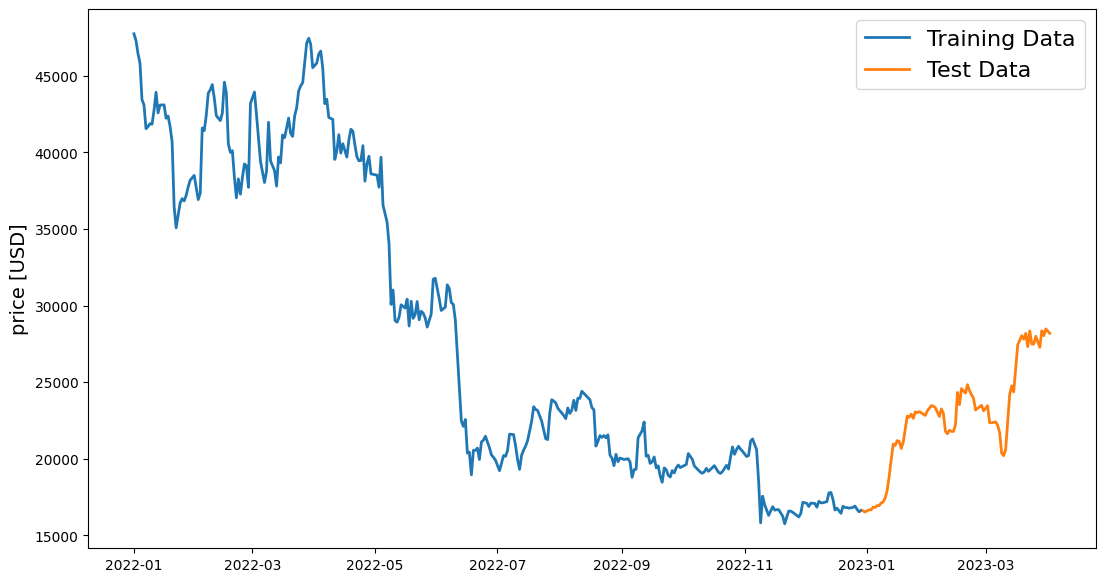

In [ ]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Test Data', title='')

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)


In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test


Building LSTM Model

In [ ]:
def build_lstm_model(input_data, output_size, neurons=100,activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 256
epochs = 50
batch_size = 16
loss = 'mse'
dropout = 0.2
optimizer = 'adam'


In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    df, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
20/20 [==============================] - 3s 48ms/step - loss: nan - val_loss: nan
Epoch 2/50
20/20 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 4/50
20/20 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 6/50
20/20 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 7/50
20/20 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 8/50
20/20 [==============================] - 1s 31ms/step - loss: nan - val_loss: nan
Epoch 9/50
12/20 [=================>............] - ETA: 0s - loss: nan

KeyboardInterrupt: ignored

In [ ]:
# Save the model
model.save('LSTM_model.h5')

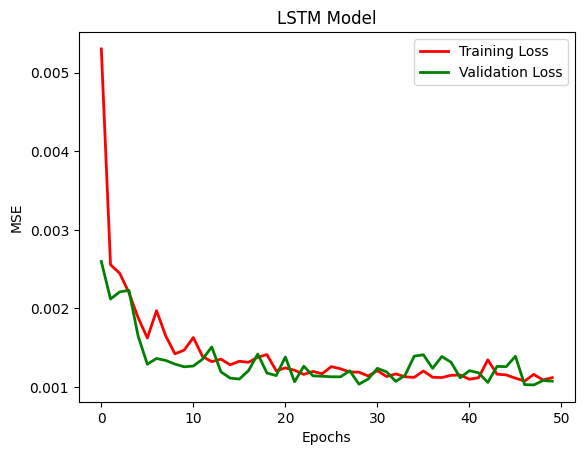

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()


In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_test, preds)

3/3 [==============================] - 1s 11ms/step


0.02180313026831624

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(preds, y_test)
MSE

0.0010260579268575186

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.8232849272310665

In [ ]:
#RMSE
import math
rmse=math.sqrt(MSE)
rmse

0.0320321389678791

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)


1.5448804932817823

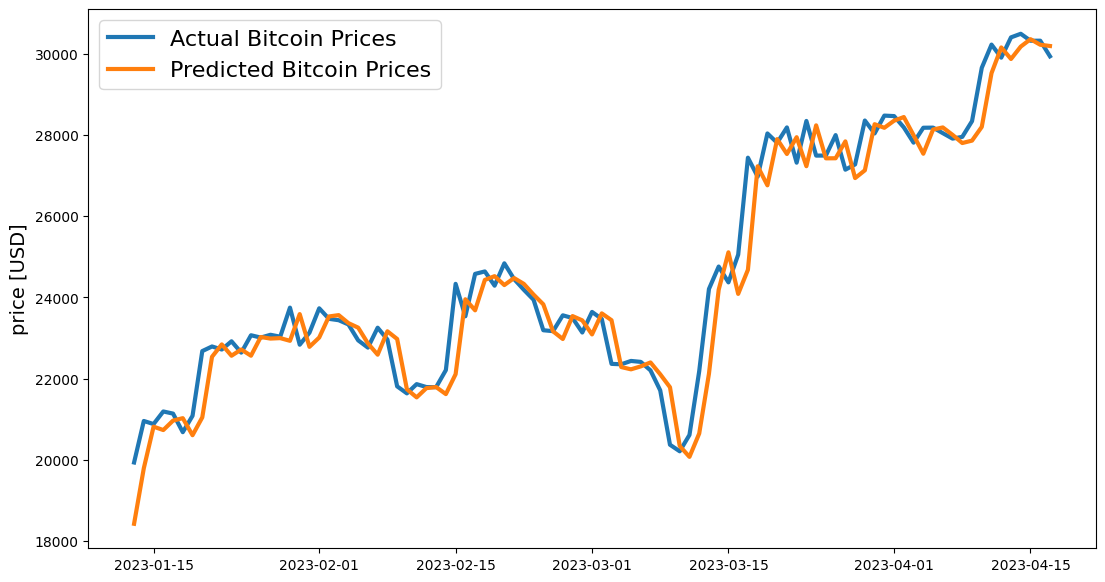

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'Actual Bitcoin Prices', 'Predicted Bitcoin Prices', lw=3)

# GRU

In [ ]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Bidirectional, GRU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist

high       low      open  volumefrom      volumeto     close
time                                                                        
2021-11-22  59391.98  55673.01  58700.83    41371.10  2.371226e+09  56303.06
2021-11-23  57873.77  55485.59  56303.06    37871.22  2.153849e+09  57566.60
2021-11-24  57740.34  55899.88  57566.60    28738.13  1.630017e+09  57175.09
2021-11-25  59437.04  57056.64  57175.09    24221.47  1.412787e+09  58966.99
2021-11-26  59201.95  53575.54  58966.99    60064.72  3.312563e+09  53788.22
...              ...       ...       ...         ...           ...       ...
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76
2023-04-03  28494.64  27290.26  28186.76    52416.66  1.467725e+09  27810.08
2023-04-04  28437.75  27674.33  27810.08    33855.00  9.519132e+08  28178.13
2023-04-05  28781.48  27841.22  28178.13    38734.09  1.097517e+09  28181.03
2023-04-06  28185.65  27888.67  28181.03     5843.70  1.638707e+08  28037.55

[501 rows x 6 columns]

In [ ]:
df_s = pd.read_csv('result.csv')
df_s['time'] = pd.to_datetime(df_s['time'], format='%d-%m-%Y')
df_s.set_index('time', inplace=True)
df_s

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-29  0.038529      0.316904
2023-03-30  0.048864      0.404545
2023-03-31  0.063939      0.396465
2023-04-01  0.110000      0.683333
2023-04-02  0.360000      0.380000

[405 rows x 2 columns]

In [ ]:
# join algorithms search
df = pd.merge(df_s, hist, on='time', how='inner')
df.head()

polarity  subjectivity      high       low      open  volumefrom  \
time                                                                           
2022-01-01  0.246667      0.586170  47950.29  46196.03  46197.31    16697.92   
2022-01-02  0.156052      0.428900  47979.26  46666.18  47737.35    13025.66   
2022-01-03  0.154861      0.453309  47572.23  45707.55  47306.41    21681.38   
2022-01-04  0.112971      0.445240  47529.48  45587.91  46450.79    29035.93   
2022-01-05  0.105557      0.408042  47067.18  42510.86  45824.54    47769.20   

                volumeto     close  
time                                
2022-01-01  7.867300e+08  47737.35  
2022-01-02  6.154534e+08  47306.41  
2022-01-03  1.011310e+09  46450.79  
2022-01-04  1.349229e+09  45824.54  
2022-01-05  2.152187e+09  43432.51

In [ ]:
#TEST AND TRAIN SPLIT

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data


In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
train

high       low      open  volumefrom      volumeto     close
time                                                                        
2021-11-22  59391.98  55673.01  58700.83    41371.10  2.371226e+09  56303.06
2021-11-23  57873.77  55485.59  56303.06    37871.22  2.153849e+09  57566.60
2021-11-24  57740.34  55899.88  57566.60    28738.13  1.630017e+09  57175.09
2021-11-25  59437.04  57056.64  57175.09    24221.47  1.412787e+09  58966.99
2021-11-26  59201.95  53575.54  58966.99    60064.72  3.312563e+09  53788.22
...              ...       ...       ...         ...           ...       ...
2022-12-23  16907.78  16763.01  16816.01    46894.60  7.890389e+08  16780.97
2022-12-24  16857.81  16779.49  16780.97    17417.89  2.931398e+08  16837.16
2022-12-25  16850.93  16736.37  16837.16    17605.22  2.958506e+08  16829.10
2022-12-26  16926.73  16796.91  16829.10    20635.79  3.477245e+08  16916.07
2022-12-27  16960.30  16606.04  16916.07    42994.72  7.209562e+08  16700.54

[401 rows x 6 columns]

In [ ]:
test

high       low      open  volumefrom      volumeto     close
time                                                                        
2022-12-28  16767.99  16471.35  16700.54    54253.61  9.015839e+08  16540.47
2022-12-29  16650.11  16487.13  16540.47    41148.04  6.824715e+08  16631.24
2022-12-30  16637.25  16364.76  16631.24    53276.85  8.802608e+08  16599.47
2022-12-31  16625.46  16487.05  16599.47    27594.76  4.569985e+08  16531.31
2023-01-01  16619.82  16502.85  16531.31    20256.16  3.352209e+08  16613.87
...              ...       ...       ...         ...           ...       ...
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76
2023-04-03  28494.64  27290.26  28186.76    52416.66  1.467725e+09  27810.08
2023-04-04  28437.75  27674.33  27810.08    33855.00  9.519132e+08  28178.13
2023-04-05  28781.48  27841.22  28178.13    38734.09  1.097517e+09  28181.03
2023-04-06  28185.65  27888.67  28181.03     5843.70  1.638707e+08  28037.55

[100 rows x 6 columns]

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

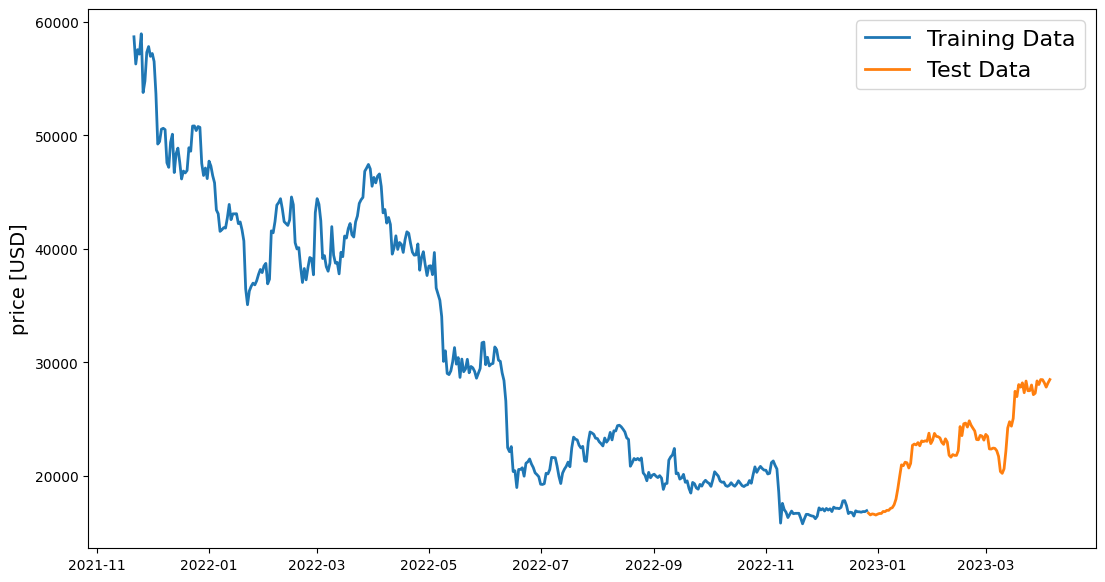

In [ ]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Test Data', title='')

In [ ]:
#PRICE NORMALISATION

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())


In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test


In [ ]:
def build_gru_model(input_data, output_size, neurons=100,activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(GRU(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
gru_neurons = 256
epochs = 50
batch_size = 16
loss = 'mse'
dropout = 0.2
optimizer = 'adam'


In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_gru_model(
    X_train, output_size=1, neurons=gru_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
25/25 [==============================] - 5s 39ms/step - loss: 0.0117 - val_loss: 0.0036
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 3/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 5/50
25/25 [==============================] - 0s 17ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 7/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8/50
25/25 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 9/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 10/50
25/25 [==============================] - 0s 17ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 11/

In [ ]:
# Save the model
model.save('GRU_model.h5')

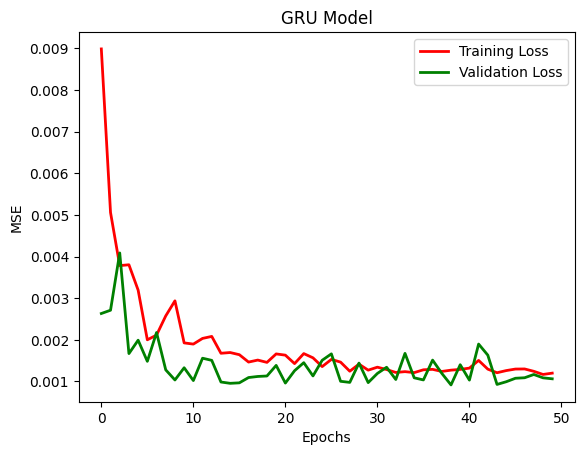

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('GRU Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_test, preds)

3/3 [==============================] - 0s 10ms/step


0.022068653104626464

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(preds, y_test)
MSE


0.0010641735718509044

In [ ]:
#RMSE
import math
rmse=math.sqrt(MSE)
rmse


0.03262167334535285

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2


0.8146509806496353

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)

1.7817792638221652

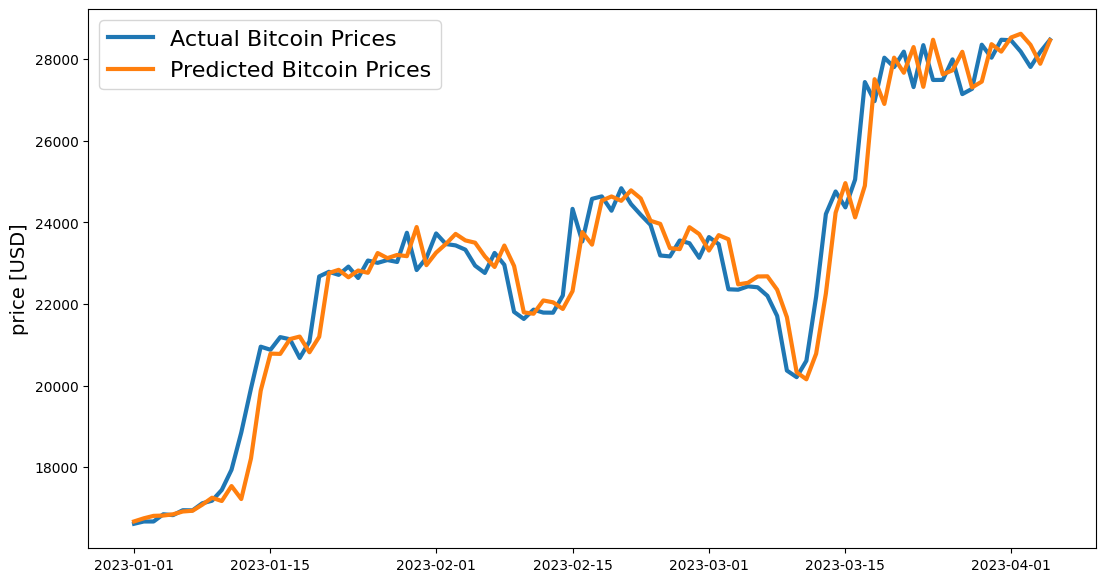

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'Actual Bitcoin Prices', 'Predicted Bitcoin Prices', lw=3)

# BiLSTM

In [ ]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Bidirectional, GRU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist

high       low      open  volumefrom      volumeto     close
time                                                                        
2021-11-21  60058.65  58575.60  59769.66    14990.70  8.880451e+08  58700.83
2021-11-22  59391.98  55673.01  58700.83    41371.10  2.371226e+09  56303.06
2021-11-23  57873.77  55485.59  56303.06    37871.22  2.153849e+09  57566.60
2021-11-24  57740.34  55899.88  57566.60    28738.13  1.630017e+09  57175.09
2021-11-25  59437.04  57056.64  57175.09    24221.47  1.412787e+09  58966.99
...              ...       ...       ...         ...           ...       ...
2023-04-01  28810.95  28265.42  28477.29    19774.03  5.632994e+08  28465.30
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76
2023-04-03  28494.64  27290.26  28186.76    52416.66  1.467725e+09  27810.08
2023-04-04  28437.75  27674.33  27810.08    33855.00  9.519132e+08  28178.13
2023-04-05  28781.48  28110.25  28178.13    12692.51  3.623035e+08  28573.00

[501 rows x 6 columns]

In [ ]:
df_s = pd.read_csv('result.csv')
df_s['time'] = pd.to_datetime(df_s['time'], format='%d-%m-%Y')
df_s.set_index('time', inplace=True)
df_s

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-29  0.038529      0.316904
2023-03-30  0.048864      0.404545
2023-03-31  0.063939      0.396465
2023-04-01  0.110000      0.683333
2023-04-02  0.360000      0.380000

[405 rows x 2 columns]

In [ ]:
# join algorithms search
df = pd.merge(df_s, hist, on='time', how='inner')
df.head()

polarity  subjectivity      high       low      open  volumefrom  \
time                                                                           
2022-01-01  0.246667      0.586170  47950.29  46196.03  46197.31    16697.92   
2022-01-02  0.156052      0.428900  47979.26  46666.18  47737.35    13025.66   
2022-01-03  0.154861      0.453309  47572.23  45707.55  47306.41    21681.38   
2022-01-04  0.112971      0.445240  47529.48  45587.91  46450.79    29035.93   
2022-01-05  0.105557      0.408042  47067.18  42510.86  45824.54    47769.20   

                volumeto     close  
time                                
2022-01-01  7.867300e+08  47737.35  
2022-01-02  6.154534e+08  47306.41  
2022-01-03  1.011310e+09  46450.79  
2022-01-04  1.349229e+09  45824.54  
2022-01-05  2.152187e+09  43432.51

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data


In [ ]:
train, test = train_test_split(hist, test_size=0.2)


In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);


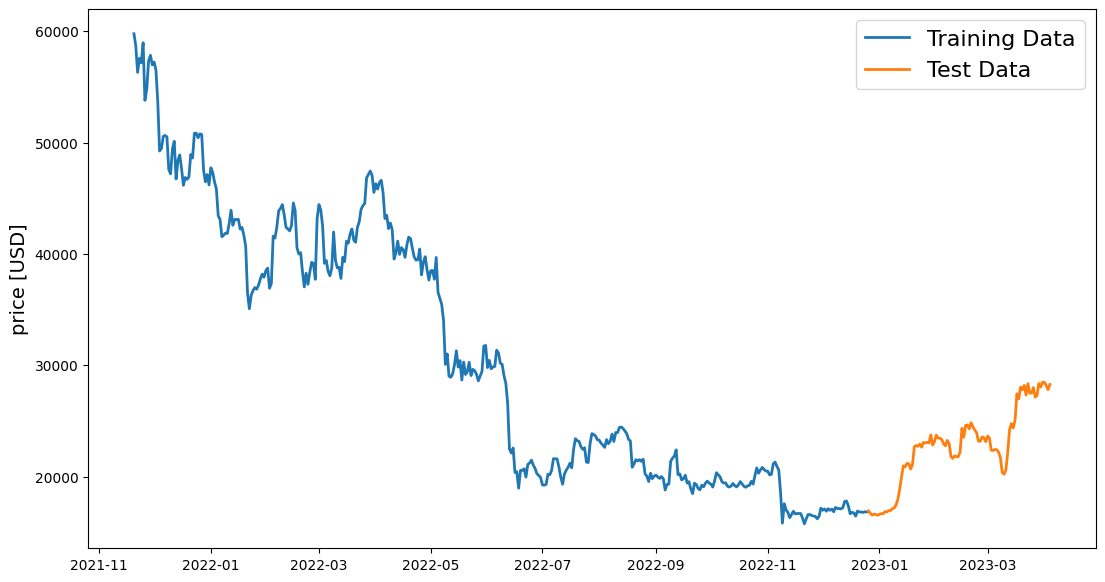

In [ ]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Test Data', title='')

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
def build_Bilstm_model(input_data, output_size, neurons=100,activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2]))))
    model.add(Dropout(dropout))
    
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 256
epochs = 50
batch_size = 8
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_Bilstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
50/50 [==============================] - 9s 54ms/step - loss: 0.0062 - val_loss: 0.0064
Epoch 2/50
50/50 [==============================] - 2s 34ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 3/50
50/50 [==============================] - 2s 45ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/50
50/50 [==============================] - 2s 47ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/50
50/50 [==============================] - 2s 35ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 6/50
50/50 [==============================] - 2s 35ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/50
50/50 [==============================] - 2s 32ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 8/50
50/50 [==============================] - 2s 31ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/50
50/50 [==============================] - 2s 34ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/50
50/50 [==============================] - 2s 49ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 11/

In [ ]:
# Save the model
model.save('BiLSTM_model.h5')

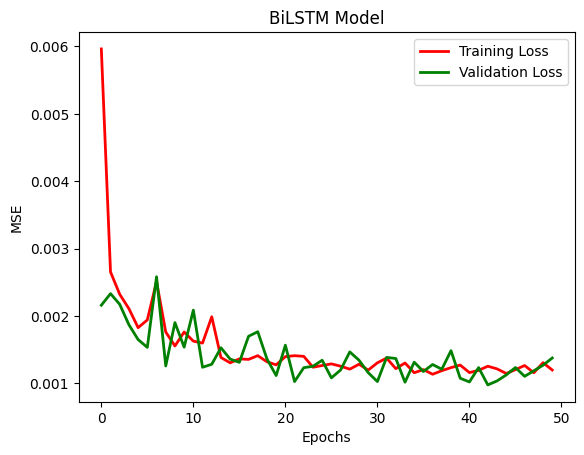

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('BiLSTM Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()


In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_test, preds)

3/3 [==============================] - 1s 14ms/step


0.021965281786852264

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(preds, y_test)
MSE


0.0010619805891254762

In [ ]:
#RMSE
import math
rmse=math.sqrt(MSE)
rmse


0.03258804365293314

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2


0.8149656835631872

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)

1.633717716523718

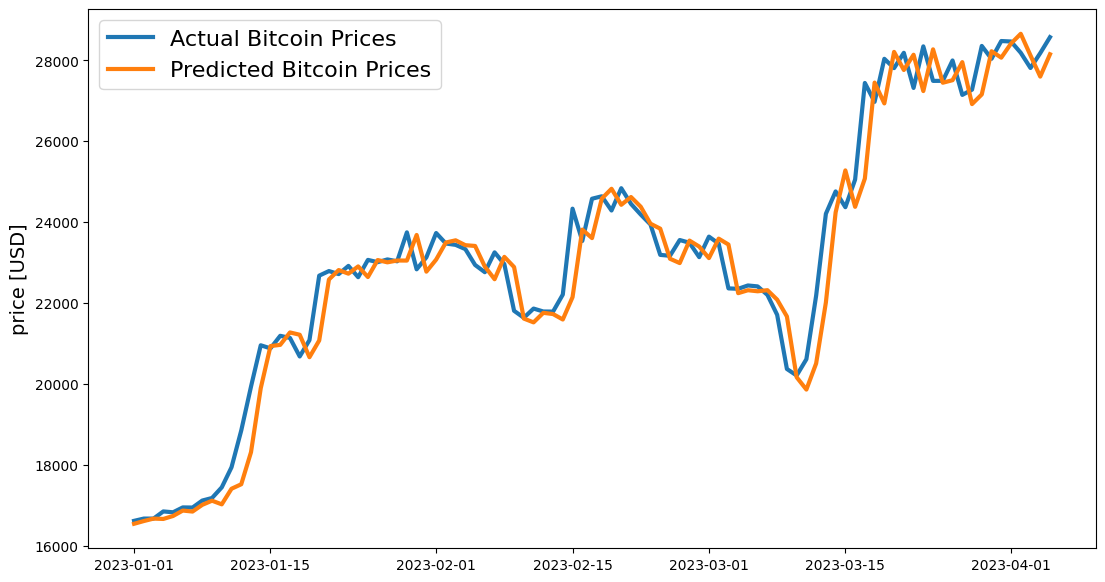

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'Actual Bitcoin Prices', 'Predicted Bitcoin Prices', lw=3)

# BiGRU

In [ ]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Bidirectional, GRU, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'


In [ ]:

hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist

high       low      open  volumefrom      volumeto     close
time                                                                        
2021-11-21  60058.65  58575.60  59769.66    14990.70  8.880451e+08  58700.83
2021-11-22  59391.98  55673.01  58700.83    41371.10  2.371226e+09  56303.06
2021-11-23  57873.77  55485.59  56303.06    37871.22  2.153849e+09  57566.60
2021-11-24  57740.34  55899.88  57566.60    28738.13  1.630017e+09  57175.09
2021-11-25  59437.04  57056.64  57175.09    24221.47  1.412787e+09  58966.99
...              ...       ...       ...         ...           ...       ...
2023-04-01  28810.95  28265.42  28477.29    19774.03  5.632994e+08  28465.30
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76
2023-04-03  28494.64  27290.26  28186.76    52416.66  1.467725e+09  27810.08
2023-04-04  28437.75  27674.33  27810.08    33855.00  9.519132e+08  28178.13
2023-04-05  28781.48  28110.25  28178.13    12894.73  3.680824e+08  28562.90

[501 rows x 6 columns]

In [ ]:
df_s = pd.read_csv('result.csv')
df_s['time'] = pd.to_datetime(df_s['time'], format='%d-%m-%Y')
df_s.set_index('time', inplace=True)
df_s

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-29  0.038529      0.316904
2023-03-30  0.048864      0.404545
2023-03-31  0.063939      0.396465
2023-04-01  0.110000      0.683333
2023-04-02  0.360000      0.380000

[405 rows x 2 columns]

In [ ]:
# join algorithms search
df = pd.merge(df_s, hist, on='time', how='inner')
df.head()


polarity  subjectivity      high       low      open  volumefrom  \
time                                                                           
2022-01-01  0.246667      0.586170  47950.29  46196.03  46197.31    16697.92   
2022-01-02  0.156052      0.428900  47979.26  46666.18  47737.35    13025.66   
2022-01-03  0.154861      0.453309  47572.23  45707.55  47306.41    21681.38   
2022-01-04  0.112971      0.445240  47529.48  45587.91  46450.79    29035.93   
2022-01-05  0.105557      0.408042  47067.18  42510.86  45824.54    47769.20   

                volumeto     close  
time                                
2022-01-01  7.867300e+08  47737.35  
2022-01-02  6.154534e+08  47306.41  
2022-01-03  1.011310e+09  46450.79  
2022-01-04  1.349229e+09  45824.54  
2022-01-05  2.152187e+09  43432.51

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data


In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);


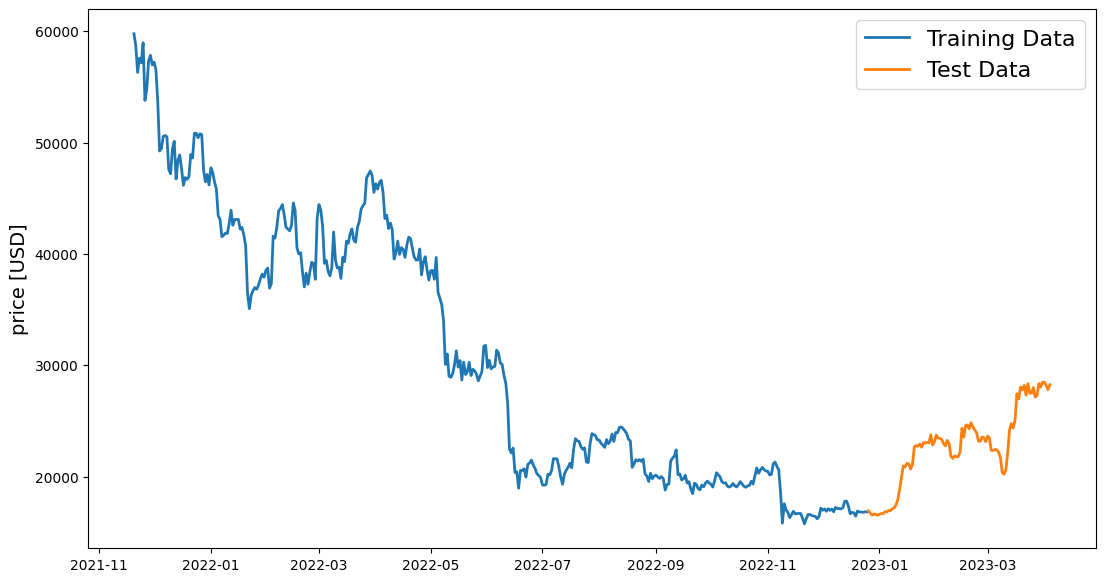

In [ ]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Test Data', title='')

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)


In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test


In [ ]:
def build_BiGRU_model(input_data, output_size, neurons=100,activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(Bidirectional(GRU(neurons, input_shape=(input_data.shape[1], input_data.shape[2]))))
    model.add(Dropout(dropout))
    
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
BiGRU_neurons = 256
epochs = 50
batch_size = 8
loss = 'mse'
dropout = 0.2
optimizer = 'adam'


In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)


In [ ]:
model = build_BiGRU_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
50/50 [==============================] - 8s 49ms/step - loss: 0.0095 - val_loss: 0.0024
Epoch 2/50
50/50 [==============================] - 1s 29ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 3/50
50/50 [==============================] - 2s 32ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 4/50
50/50 [==============================] - 2s 39ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 5/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 6/50
50/50 [==============================] - 1s 28ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/50
50/50 [==============================] - 2s 34ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 8/50
50/50 [==============================] - 1s 29ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 9/50
50/50 [==============================] - 1s 29ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/50
50/50 [==============================] - 1s 30ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 11/

In [ ]:
# Save the model
model.save('BiGRU_model.h5')

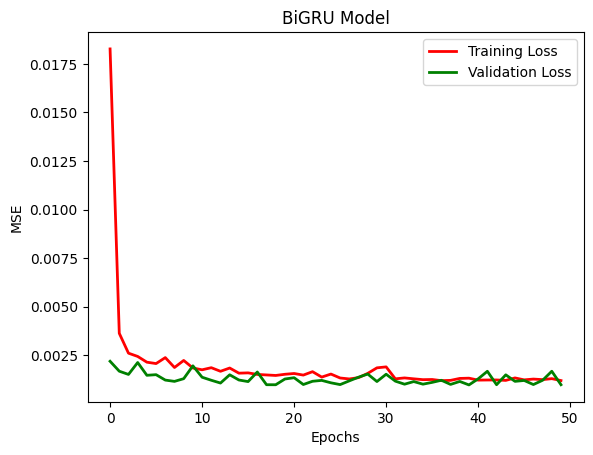

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('BiGRU Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()


In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_test, preds)

3/3 [==============================] - 1s 12ms/step


0.02202054473190268

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(preds, y_test)
MSE

0.0010271579196462544

In [ ]:
#RMSE
import math
rmse=math.sqrt(MSE)
rmse

0.03204930451111622

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2


0.8210395003921562

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)

1.4496383072230075

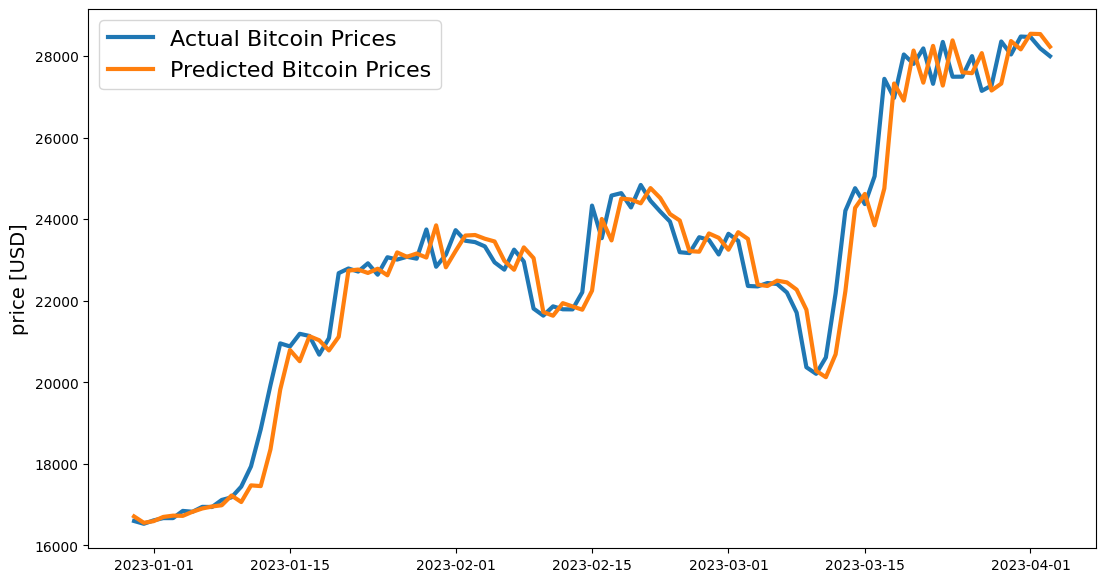

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'Actual Bitcoin Prices', 'Predicted Bitcoin Prices', lw=3)

# Hybrid Model



In [ ]:
import json
import requests
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Bidirectional, GRU, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'


In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist.to_csv('price_dataset.csv')
hist

high       low      open  volumefrom      volumeto     close
time                                                                        
2021-11-22  59391.98  55673.01  58700.83    41371.10  2.371226e+09  56303.06
2021-11-23  57873.77  55485.59  56303.06    37871.22  2.153849e+09  57566.60
2021-11-24  57740.34  55899.88  57566.60    28738.13  1.630017e+09  57175.09
2021-11-25  59437.04  57056.64  57175.09    24221.47  1.412787e+09  58966.99
2021-11-26  59201.95  53575.54  58966.99    60064.72  3.312563e+09  53788.22
...              ...       ...       ...         ...           ...       ...
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76
2023-04-03  28494.64  27290.26  28186.76    52416.66  1.467725e+09  27810.08
2023-04-04  28437.75  27674.33  27810.08    33855.00  9.519132e+08  28178.13
2023-04-05  28781.48  27841.22  28178.13    38734.09  1.097517e+09  28181.03
2023-04-06  28185.65  27726.09  28181.03    12925.02  3.615764e+08  27915.80

[501 rows x 6 columns]

In [ ]:
df_s = pd.read_csv('result.csv')
df_s['time'] = pd.to_datetime(df_s['time'], format='%d-%m-%Y')
df_s.set_index('time', inplace=True)
df_s

polarity  subjectivity
time                              
2022-01-01  0.246667      0.586170
2022-01-02  0.156052      0.428900
2022-01-03  0.154861      0.453309
2022-01-04  0.112971      0.445240
2022-01-05  0.105557      0.408042
...              ...           ...
2023-03-29  0.038529      0.316904
2023-03-30  0.048864      0.404545
2023-03-31  0.063939      0.396465
2023-04-01  0.110000      0.683333
2023-04-02  0.360000      0.380000

[405 rows x 2 columns]

In [ ]:
# join algorithms search
df = pd.merge(hist, df_s, on='time', how='inner')
df_mean = df.groupby(df.index).mean()
df = df_mean
df.to_csv('final_merged_data.csv')
df

high       low      open  volumefrom      volumeto     close  \
time                                                                           
2022-01-01  47950.29  46196.03  46197.31    16697.92  7.867300e+08  47737.35   
2022-01-02  47979.26  46666.18  47737.35    13025.66  6.154534e+08  47306.41   
2022-01-03  47572.23  45707.55  47306.41    21681.38  1.011310e+09  46450.79   
2022-01-04  47529.48  45587.91  46450.79    29035.93  1.349229e+09  45824.54   
2022-01-05  47067.18  42510.86  45824.54    47769.20  2.152187e+09  43432.51   
...              ...       ...       ...         ...           ...       ...   
2023-03-29  28640.99  27261.75  27274.90    52216.18  1.471076e+09  28355.87   
2023-03-30  29172.90  27731.64  28355.87    63033.78  1.790022e+09  28037.46   
2023-03-31  28650.47  27541.23  28037.46    50916.39  1.436740e+09  28477.29   
2023-04-01  28810.95  28265.42  28477.29    19774.03  5.632994e+08  28465.30   
2023-04-02  28538.36  27880.95  28465.30    21016.25  5.925811e+08  28186.76   

            polarity  subjectivity  
time                                
2022-01-01  0.246667      0.586170  
2022-01-02  0.156052      0.428900  
2022-01-03  0.154861      0.453309  
2022-01-04  0.112971      0.445240  
2022-01-05  0.105557      0.408042  
...              ...           ...  
2023-03-29  0.057766      0.327414  
2023-03-30  0.064007      0.429587  
2023-03-31  0.080120      0.397380  
2023-04-01  0.110000      0.683333  
2023-04-02  0.236419      0.409432  

[395 rows x 8 columns]

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

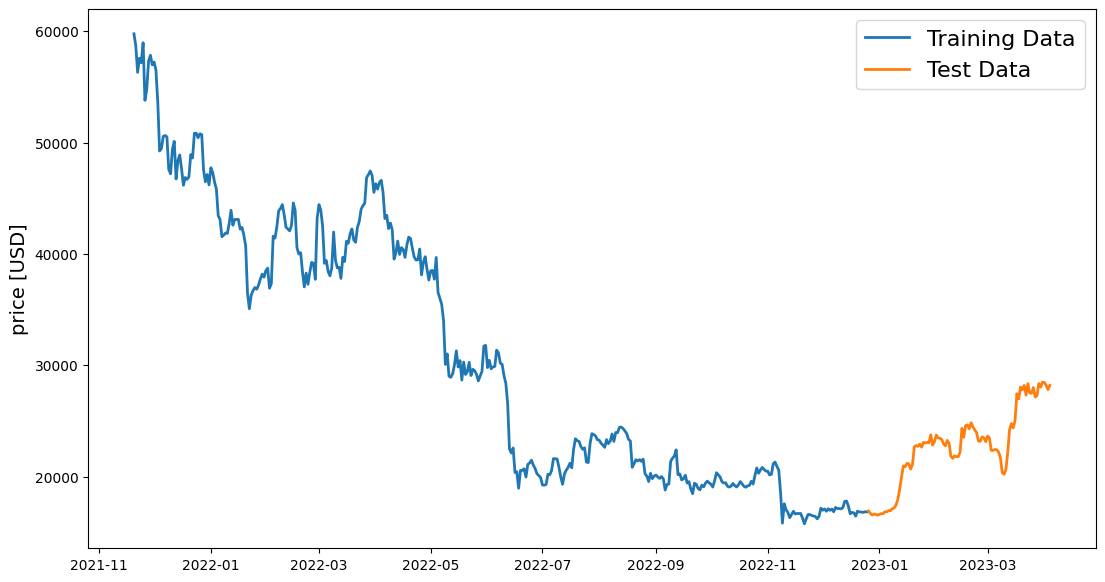

In [ ]:
line_plot(train[target_col], test[target_col], 'Training Data', 'Test Data', title='')

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())


In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1
    
   

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
def build_hybrid_model(input_data, output_size, neurons=100,activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    
    
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2]), return_sequences=True)))
    model.add(Dropout(dropout))
    model.add(Bidirectional(GRU(neurons, return_sequences=False)))
    model.add(Dropout(0.2))
    
    
    model.add(Dense(units=output_size, activation=activ_func))


    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
hybrid_neurons = 256
epochs = 50
batch_size = 8
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_hybrid_model(
    X_train, output_size=1, neurons=hybrid_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
50/50 [==============================] - 18s 140ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 2/50
50/50 [==============================] - 4s 78ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 3/50
50/50 [==============================] - 5s 96ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 4/50
50/50 [==============================] - 4s 88ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 5/50
50/50 [==============================] - 4s 80ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/50
50/50 [==============================] - 5s 101ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 7/50
50/50 [==============================] - 4s 85ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/50
50/50 [==============================] - 4s 81ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/50
50/50 [==============================] - 5s 102ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
50/50 [==============================] - 4s 81ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch

In [ ]:
# Save the model
model.save('hybrid_model.h5')

In [ ]:
import pickle

# Assume that 'model' is the trained model
with open('hybrid_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 512)           538624    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 5, 512)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1182720   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,721,857
Trainable params: 1,721,857
Non-

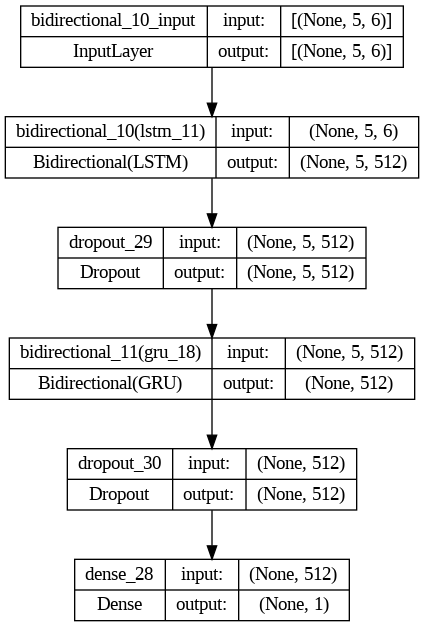

In [ ]:
plot_model(model, to_file='hybrid_model.png', show_shapes=True)

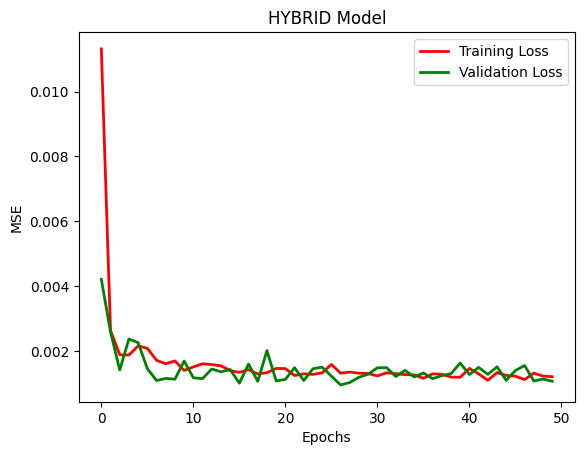

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('HYBRID Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(y_test, preds)

3/3 [==============================] - 2s 32ms/step


0.022344971606728544

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(preds, y_test)
MSE


0.0009471213435966301

In [ ]:
#RMSE
import math
rmse=math.sqrt(MSE)
rmse

0.030775336612239194

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.8356308976309528

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)


1.500410541805699

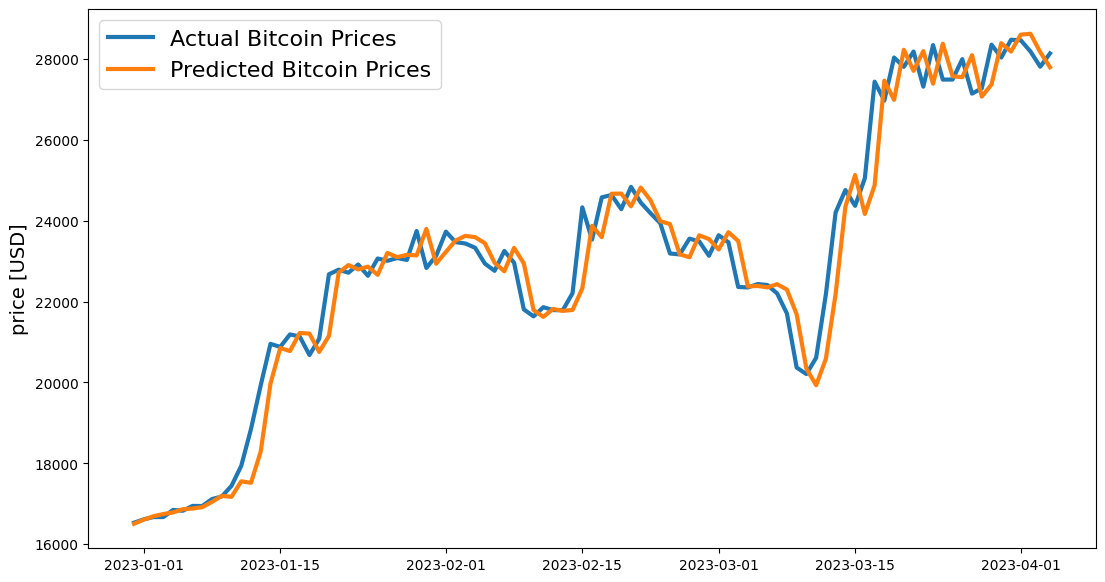

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'Actual Bitcoin Prices', 'Predicted Bitcoin Prices', lw=3)